In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


# Polynomial Regression Model  

Polynomial regression is a type of regression analysis where the relationship between the independent variable (X) and the dependent variable (Y) is modeled as an nth degree polynomial. It is an extension of simple linear regression, which assumes a linear relationship between X and Y. Polynomial regression allows for more flexible modeling, accommodating curves and non-linear patterns in the data.

The general form of a polynomial regression model is:

Y = β₀ + β₁X + β₂X² + β₃X³ + ...+ βₙXⁿ + ɛ

where Y is the dependent variable, X is the independent variable, β₀, β₁, β₂, ..., βₙ are the coefficients of the polynomial terms, n is the degree of the polynomial, and ɛ is the error term.

To fit a polynomial regression model, you need to determine the degree of the polynomial (n) and estimate the coefficients (β₀, β₁, β₂, ..., βₙ) using a method like least squares regression. The least squares method minimizes the sum of squared differences between the actual Y values and the predicted Y values from the polynomial regression model.

Once you have estimated the coefficients, you can use the polynomial regression model to make predictions for new values of X by plugging them into the equation.

It's important to note that while polynomial regression can capture non-linear relationships, higher degree polynomials can lead to overfitting. Overfitting occurs when the model fits the training data too closely, resulting in poor generalization to new data. Therefore, it's essential to select an appropriate degree for the polynomial that balances the fit to the data and the risk of overfitting.


Y = β₀ + β₁X 

Y = β^0 X^0  + β₁X + β₂X² + ɛ

Y = β₀ + β₁X + β₂X² + β₃X³ + ...+ βₙXⁿ + ɛ


In [2]:
df = pd.read_csv("/kaggle/input/ushape/ushape.csv")

In [3]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [4]:
df = df.rename(columns={'3.159499363321345566e-02':'X'})
df = df.rename(columns={'9.869877579082642072e-01':'Y'})

In [5]:
df=df.rename(columns={'0.000000000000000000e+00':'class'})

In [6]:
df 

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0
...,...,...,...
94,1.699453,0.587720,1.0
95,0.218623,-0.652521,1.0
96,0.952914,-0.419766,1.0
97,-1.318500,0.423112,0.0


In [7]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

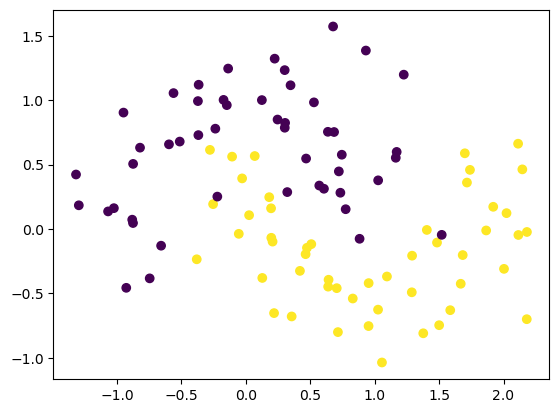

In [8]:
plt.scatter(X[:,0],X[:,1],c=y)

In [9]:
from sklearn.linear_model import LogisticRegression

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
clf = LogisticRegression()

In [11]:
clf.fit(X,y)

LogisticRegression()

<Axes: >

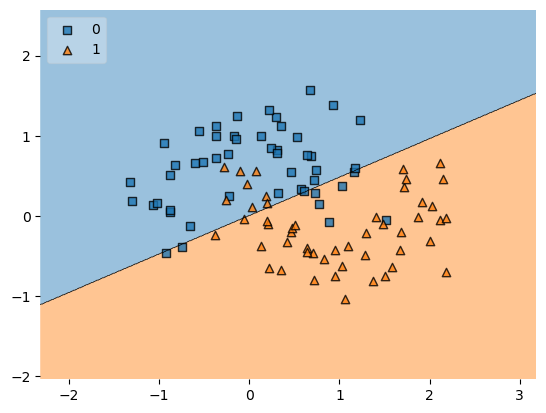

In [12]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y.astype('int'), clf, legend=2)

In [13]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

0.8300000000000001

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
X_trf = poly.fit_transform(X)

In [15]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10))

0.9099999999999999

In [16]:
def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

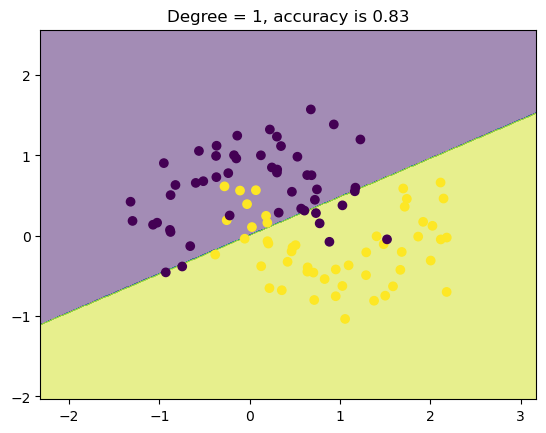

In [17]:
plot_decision_boundary(X,y)

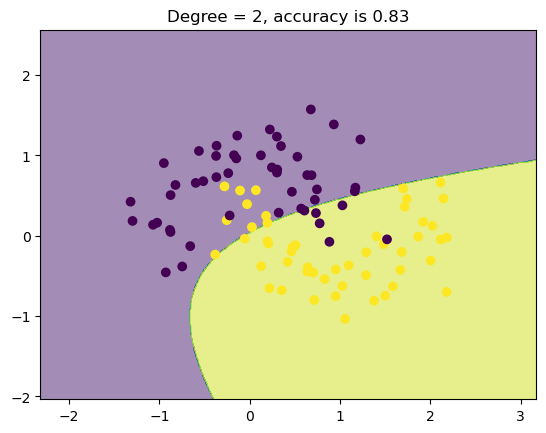

In [18]:
plot_decision_boundary(X,y,degree=2)

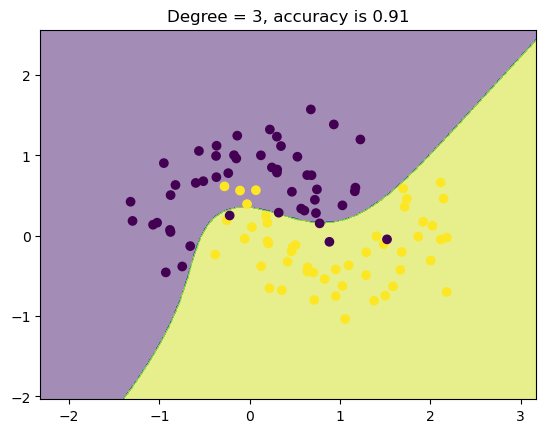

In [19]:
plot_decision_boundary(X,y,degree=3)

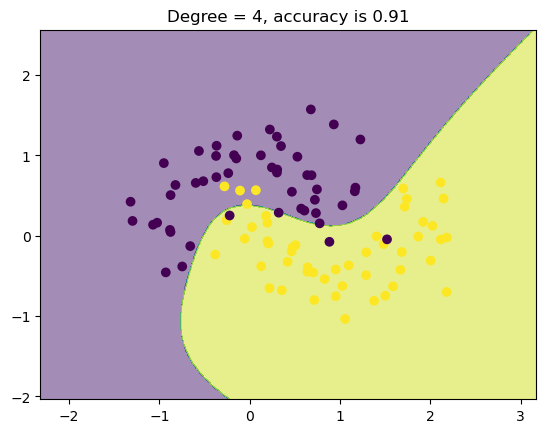

In [20]:
plot_decision_boundary(X,y,degree=4)

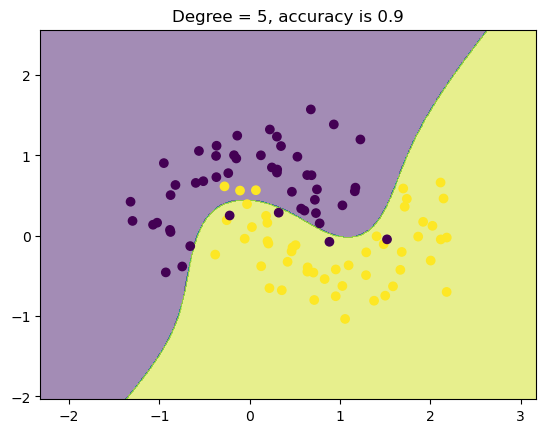

In [21]:
plot_decision_boundary(X,y,degree=5)

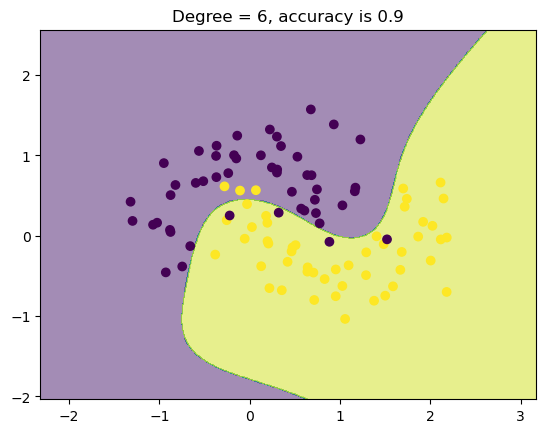

In [22]:
plot_decision_boundary(X,y,degree=6)

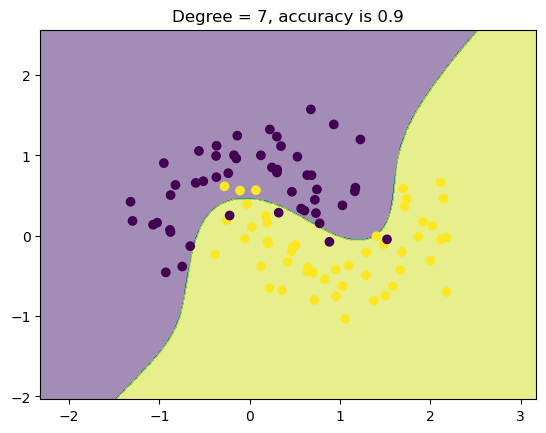

In [23]:
plot_decision_boundary(X,y,degree=7)

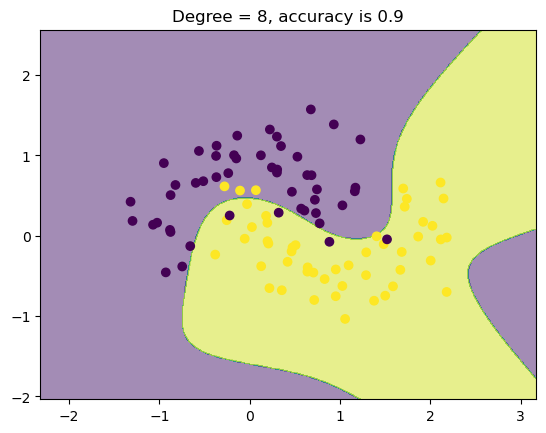

In [24]:
plot_decision_boundary(X,y,degree=8)